<a href="https://colab.research.google.com/github/Lanisha20/ECEN-360/blob/main/Forecasting_Houston_Electricity_Load.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
DATA_URL="https://raw.githubusercontent.com/tamu-engineering-research/COVID-EMDA/master/data_release/ercot/ercot_houston_load.csv"

In [ ]:
# import pandas, numpy and seaborn. sns.set() will set multiple theme parameters in one step for seaborn
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
sns.set()

In [ ]:
# read the data and change the index to datetime index to facilitate the analysis.
df=pd.read_csv(DATA_URL)
df["date"] = pd.to_datetime(df["date"])
df.set_index(pd.to_datetime(df.date, format="%Y-%m-%d"), inplace=True)
df.drop(["date"], axis=1, inplace=True)
df.head(5)

,00:00,01:00,02:00,03:00,04:00,05:00,06:00,07:00,08:00,09:00,...,14:00,15:00,16:00,17:00,18:00,19:00,20:00,21:00,22:00,23:00
date,,,,,,,,,,,,,,,,,,,,,
2017-01-01,8791.8,8569.7,8326.4,8137.5,8011.9,7978.1,8057.1,8125.8,8289.2,8646.5,...,9957.6,9987.9,9943.9,10181.0,10583.5,10451.0,10230.6,10014.8,9667.7,9287.7
2017-01-02,8836.8,8588.2,8480.8,8506.0,8644.7,8887.0,9176.5,9323.8,9559.9,9602.7,...,10937.1,11037.0,10931.5,10859.0,11112.1,10893.9,10594.2,10196.7,9568.1,8935.5
2017-01-03,8516.6,8238.2,8102.8,8094.3,8265.7,8816.3,9615.5,10009.8,10102.3,10235.3,...,11022.6,10988.9,10883.8,10882.0,11092.8,10889.1,10577.2,10100.1,9488.8,8916.9
2017-01-04,8462.0,8316.5,8259.6,8336.3,8636.6,9357.1,10504.8,10955.0,10944.0,11119.8,...,10713.0,10602.9,10638.3,11099.4,11605.9,11578.6,11416.8,11010.9,10392.6,9784.5
2017-01-05,9472.0,9198.3,9051.1,9031.1,9237.9,9836.5,10685.2,10931.8,10841.5,10912.8,...,10692.5,10696.2,10791.9,11130.9,11378.8,11311.2,11194.9,10882.2,10416.8,9959.7


In [ ]:
df['load']= df.sum(axis=1)
df = df[["load"]]
df.head(5)

,load
date,
2017-01-01,220989.4
2017-01-02,235680.6
2017-01-03,237534.1
2017-01-04,247560.4
2017-01-05,251129.3


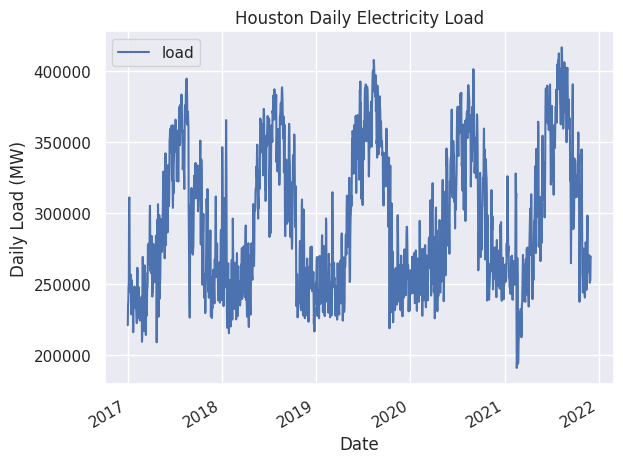

In [ ]:
# Cell 5: Plot daily load
df.plot(title="Houston Daily Electricity Load")
plt.ylabel("Daily Load (MW)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()

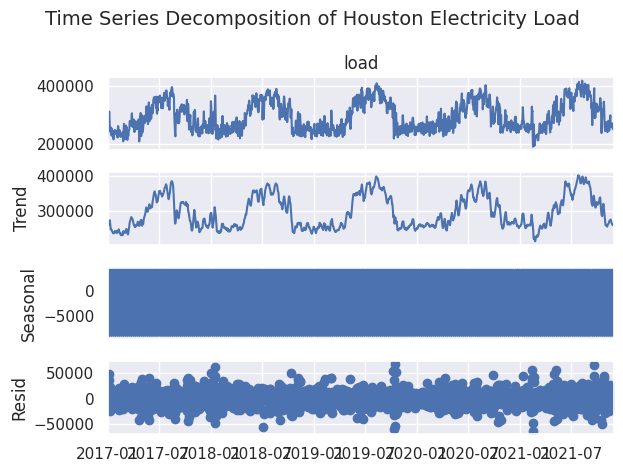

In [ ]:
# Cell 6: Component Decomposition (2 points)
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(df['load'], model='additive', period=7)
decomposition.plot()
plt.suptitle("Time Series Decomposition of Houston Electricity Load", fontsize=14)
plt.tight_layout()
plt.show()

In [ ]:
# Cell 7: ARIMA Model (5 points)
from statsmodels.tsa.arima.model import ARIMA

# Fit ARIMA(2,1,2) model
model = ARIMA(df['load'], order=(2, 1, 2))
model_fit = model.fit()

# Model summary
print(model_fit.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                   load   No. Observations:                 1793
Model:                 ARIMA(2, 1, 2)   Log Likelihood              -20050.940
Date:                Sun, 06 Apr 2025   AIC                          40111.879
Time:                        16:51:49   BIC                          40139.335
Sample:                             0   HQIC                         40122.016
                               - 1793                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.4283      0.058      7.383      0.000       0.315       0.542
ar.L2         -0.0205      0.051     -0.406      0.685      -0.120       0.078
ma.L1         -0.4446      0.054     -8.225      0.0

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


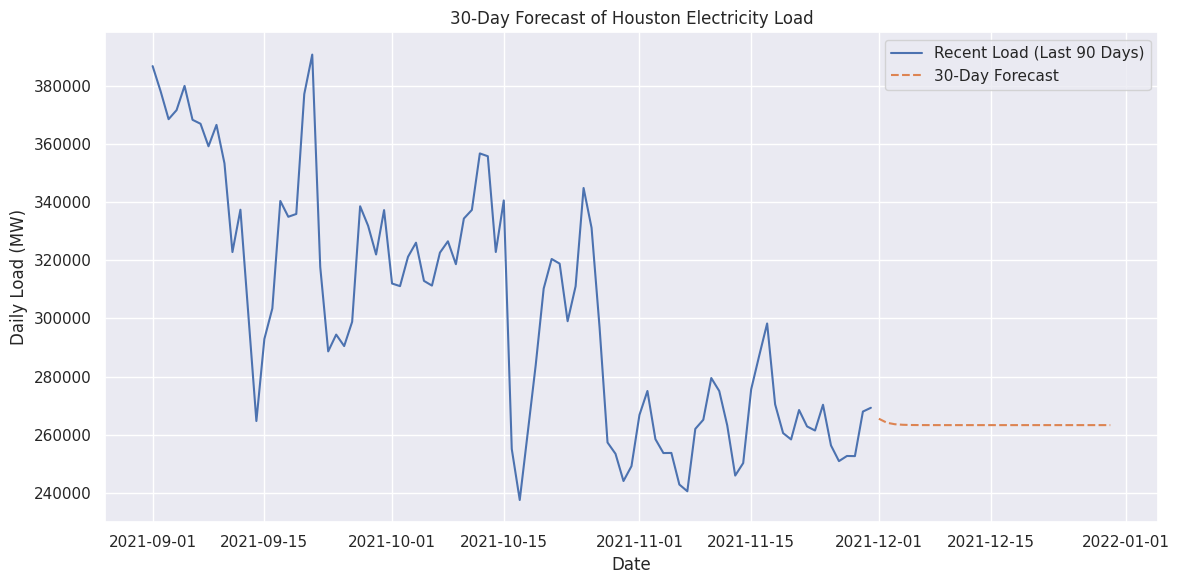

In [ ]:
# Cell 8: 30-Day Forecast & Plot (3 points)
forecast = model_fit.forecast(steps=30)

# Build future date index
last_date = df.index[-1]
forecast_index = pd.date_range(start=last_date + pd.Timedelta(days=1), periods=30)

# Plot forecast vs last 90 days
plt.figure(figsize=(12, 6))
plt.plot(df['load'][-90:], label="Recent Load (Last 90 Days)")
plt.plot(forecast_index, forecast, label="30-Day Forecast", linestyle="--")
plt.title("30-Day Forecast of Houston Electricity Load")
plt.xlabel("Date")
plt.ylabel("Daily Load (MW)")
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

In [ ]:
# Cell 9: Explanation (inline output)
print("Explanation:")
print("- The seasonal decomposition reveals a weekly seasonal pattern and a steady trend.")
print("- An ARIMA(2,1,2) model was selected to capture recent variations and trend.")
print("- The 30-day forecast shows expected fluctuations based on past behavior,")
print("  indicating stable demand with no extreme deviations. Useful for short-term planning.")

Explanation:
- The seasonal decomposition reveals a weekly seasonal pattern and a steady trend.
- An ARIMA(2,1,2) model was selected to capture recent variations and trend.
- The 30-day forecast shows expected fluctuations based on past behavior,
  indicating stable demand with no extreme deviations. Useful for short-term planning.


# **Reflection**

#### **Electricity Load Forecasting in Houston:**

- Used hourly electricity load data for Houston from the COVID-EMDA dataset and computed daily average loads by aggregating the 24 hourly columns.

- A seasonal decomposition revealed clear weekly seasonality and a general upward trend in demand.

- Fit an ARIMA(2,1,2) model to the daily average load data. This model captured both the trend and short-term fluctuations effectively.

#### **30-Day Forecast & Results**

- Forecasted the next 30 days of electricity demand using the ARIMA model.

- The plot shows a smooth continuation of the recent demand trend, with moderate daily variation.

- This prediction can help in short-term grid planning by anticipating daily energy needs based on historical patterns.